In [16]:
# Download extra libraries
!pip install wordcloud


In [17]:
# import necessary modules
from IPython.display import Image
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt	
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Graph Functions

In [18]:
def word_cloud(col):
	"""
	Takes in dataframe and plots a wordclous using matplotlib
	"""
	plt.subplots(figsize = (12,10))
	wordcloud = WordCloud(
							background_color = 'white',
							width = 1000,
							height = 800).generate(" ".join(col))
	plt.imshow(wordcloud)
	plt.axis('off')
	plt.show()


In [19]:
def create_bar_chart(serie):
    dist_val = serie.value_counts()
    dist_val.plot(kind='bar')
    

In [20]:
def create_pie_chart(panda_frame, label, count, title):
    # Create a pie chart
    
    panda_frame.plot(kind='pie', y=count, labels=panda_frame[label], autopct='%1.1f%%',figsize=(12, 12))

    # Add title
    plt.title(title)

    # Show the chart
    plt.show()

# Analysis

In [30]:
# Load JSON file into a Pandas DataFrame
streaming = pd.read_json('StreamingHistory1.json')
search_queries = pd.read_json('SearchQueries.json')
streaming.head()

,endTime,artistName,trackName,msPlayed
0,2023-01-05 16:22,Anna Landström,To the Rain,141966
1,2023-01-05 16:25,Joy Meyer-Williams,Autumn Night,172896
2,2023-01-05 16:28,Jon Hopkins,Wintergreen,180531
3,2023-01-05 16:30,Igulfrid,Hideaway,146806
4,2023-01-05 16:32,Giovanna Petrini,Nascondiglio,116950


In [22]:
search_queries.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,IPHONE_ARM64,2023-01-11T21:04:19.981Z[UTC],bla,[]
1,IPHONE_ARM64,2023-01-11T21:04:24.375Z[UTC],simply,[]
2,IPHONE_ARM64,2023-01-29T19:13:57.108Z[UTC],malo,[]
3,IPHONE_ARM64,2023-02-01T15:34:20.004Z[UTC],l’,[]
4,IPHONE,2023-02-01T15:34:21.141Z[UTC],l’appunt,[spotify:track:5PnEkOUOFnk0wMI71JwddQ]


KeyboardInterrupt: 

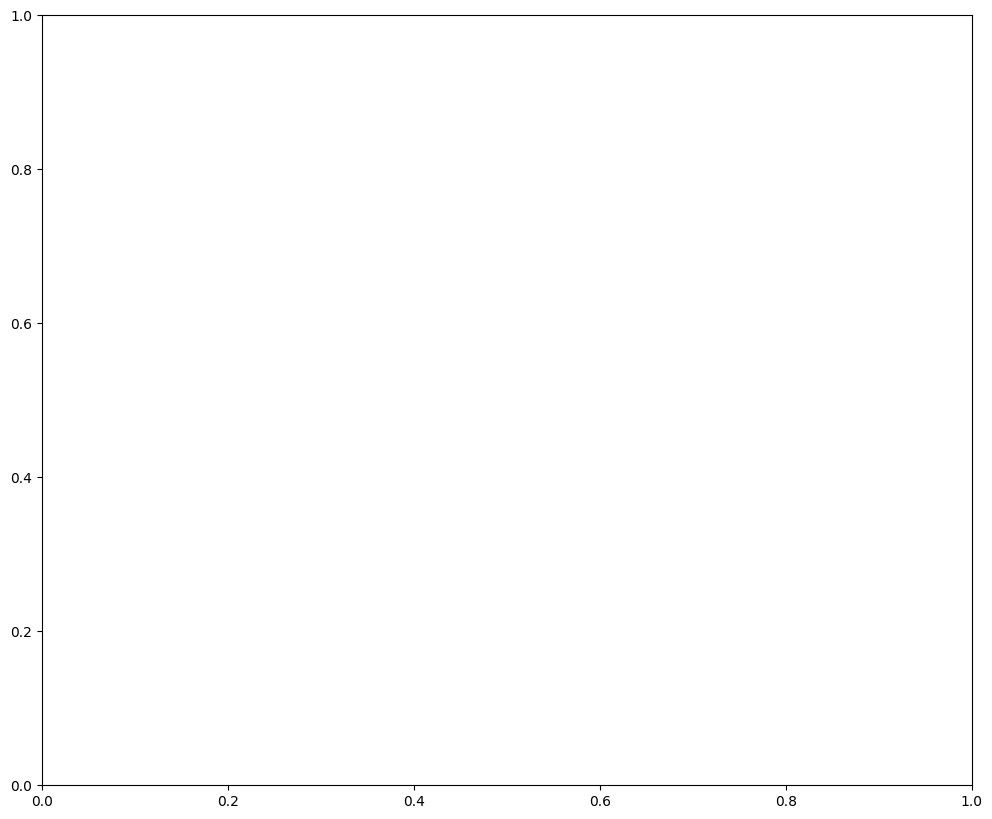

In [23]:
# display a frequency of words in world-cloud search history
word_cloud(search_queries['searchQuery'])

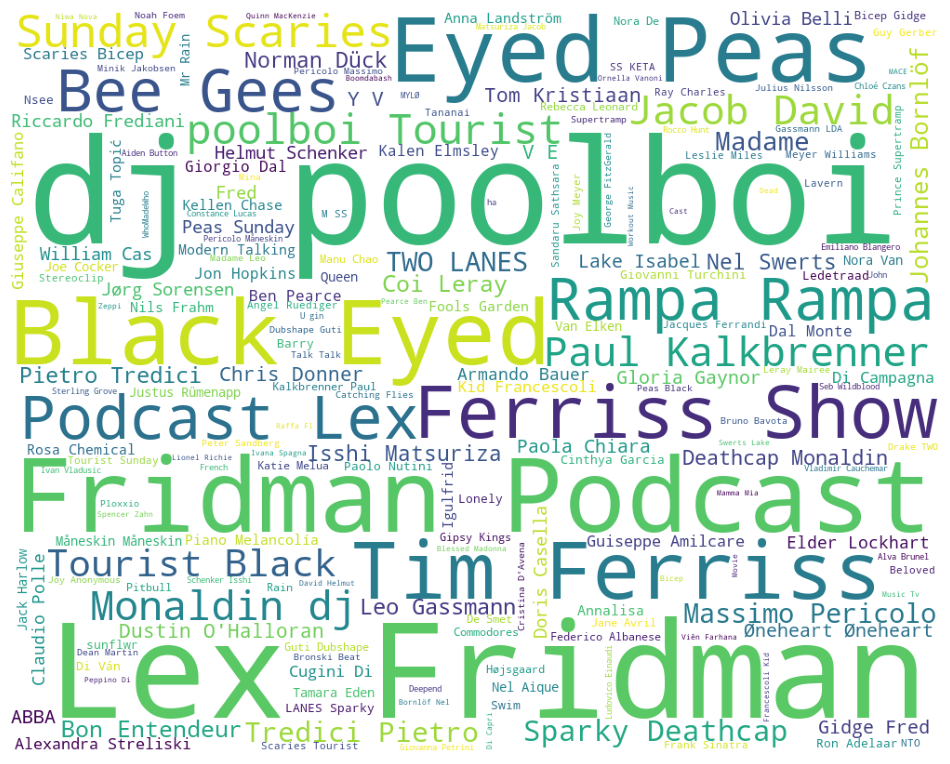

In [ ]:
# display a frequency of words in world-cloud artist
word_cloud(streaming['artistName'])

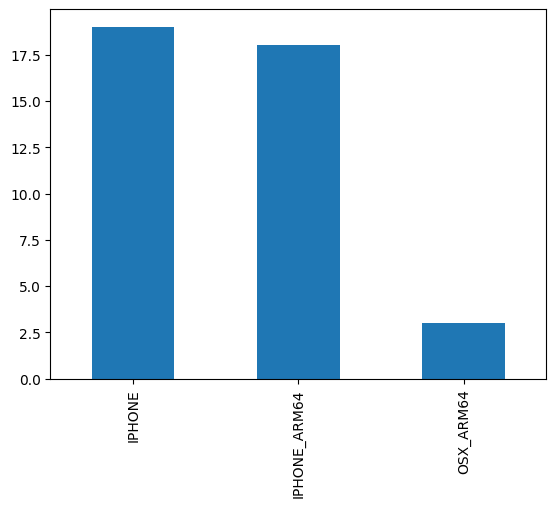

In [ ]:
create_bar_chart(search_queries['platform'])

/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_61471/1262615183.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = streaming.head(20).groupby('trackName').sum().reset_index()


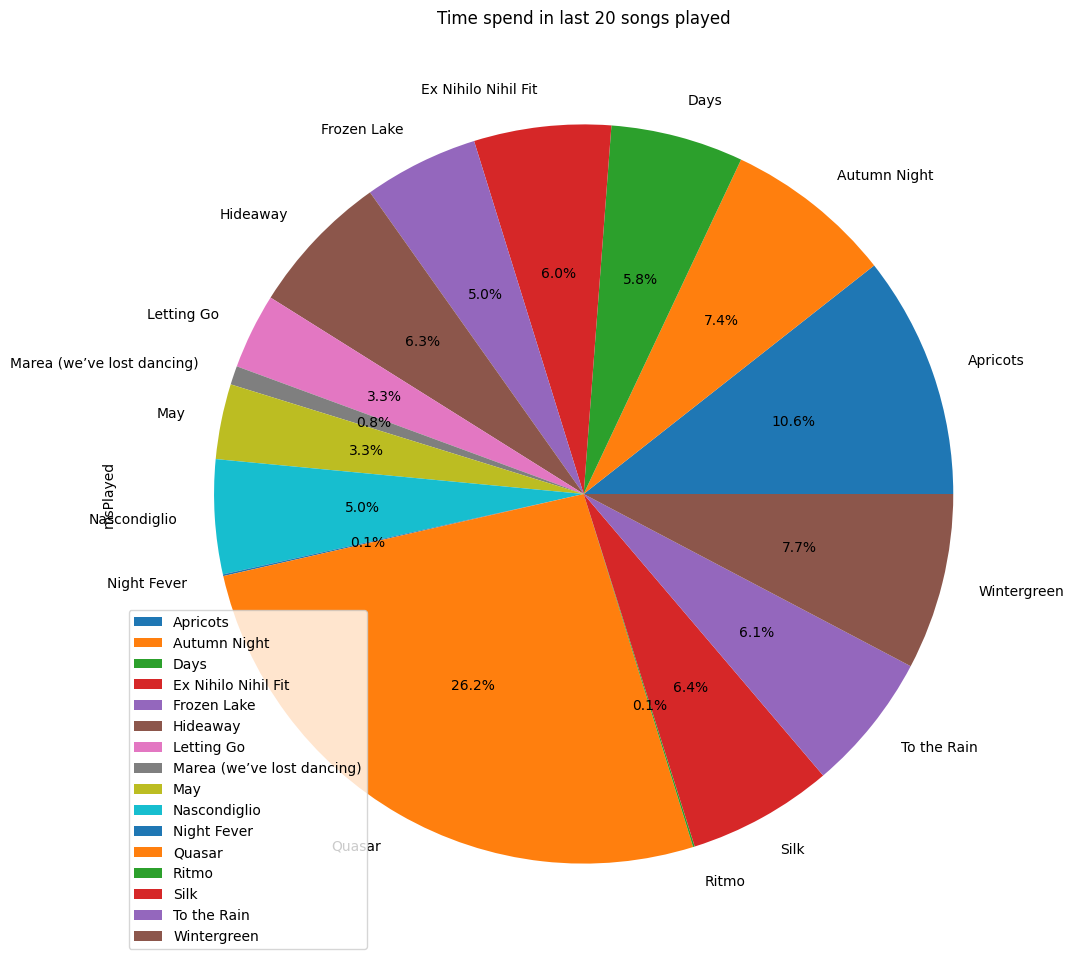

In [ ]:
new_df = streaming.head(20).groupby('trackName').sum().reset_index()
create_pie_chart(new_df, 'trackName', 'msPlayed','Time spend in last 20 songs played')

/var/folders/dn/x_8ks55n46x692nkj1bx2rbw0000gn/T/ipykernel_61471/3119369962.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = streaming.head(20).groupby('artistName').sum().reset_index()


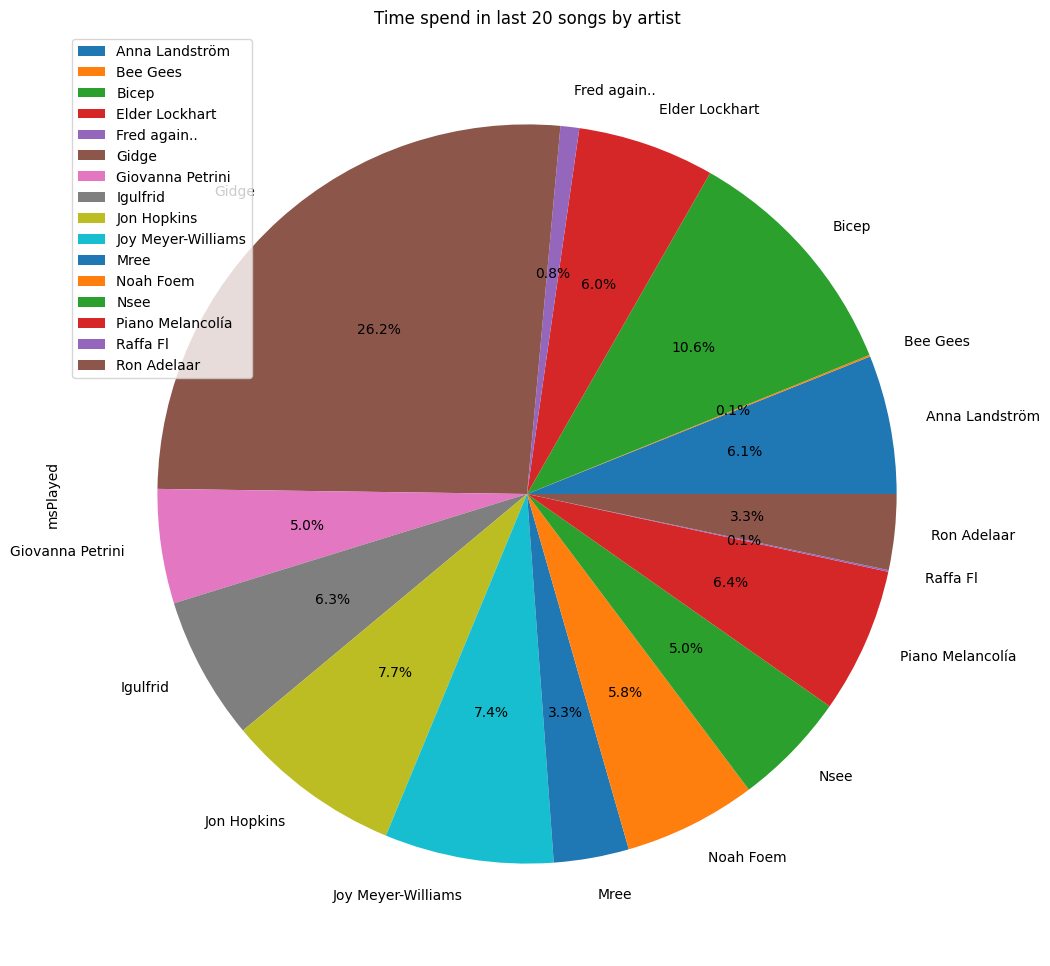

In [ ]:
new_df = streaming.head(20).groupby('artistName').sum().reset_index()
create_pie_chart(new_df, 'artistName', 'msPlayed', 'Time spend in last 20 songs by artist')

# SPOTIFY API EXPLORATION


In [60]:
import requests

streaming.head(30)

In [64]:
def spotify_search_track(track_name: str, access_token: str):
    request = requests.get('https://api.spotify.com/v1/search?q=' + track_name + '&type=track', headers={'Authorization': 'Bearer ' + access_token})
    return request.json()

In [72]:
def spotify_fetch_album(album_id: str, access_token: str):
    request = requests.get('https://api.spotify.com/v1/albums/' + album_id, headers={'Authorization': 'Bearer ' + access_token})
    return request.json()

In [73]:

access_token = "BQBkTe8IbXkx13mTFTvc1DPIFUI8hxy0Ya8_PaRxJxElDPTQOKE0_Geg3pwpobHRe16tGEcwD2Io7ws9rp0e4WqcBPTxo1-bVV-1uVVw2t4yFZKrxJ3v"
track_name = df["trackName"][1]
req1 = spotify_search_track(track_name, access_token)

#Check if we have a successful response
if(req1 and 'tracks' in req1):
    tracks_results = req1['tracks']['items']
    first_result = tracks_results[0]
    id = first_result['id']
    track_info = {
        'id' : first_result['id'],
        'album_id': first_result['album']['id'],
        'duration_ms' : first_result['duration_ms'],
        'popularity' : first_result['popularity'],
        'track_name': first_result['name'],
        'artists': list(map(lambda x: x['name'], first_result['artists']))
    }

    
    #Second API request for more information about the album (release date, genres)
    req2 = spotify_fetch_album(track_info['album_id'], access_token)
    if(req2):
        track_info['release_date'] = req2['release_date']
        track_info['genres'] = req2['genres']
        print("Spotify results:", track_info)



2EqOuPPTOth7VS70I1kvta
{'album_group': 'single', 'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4I6wXEDAaa18CfmvwMJalK'}, 'href': 'https://api.spotify.com/v1/artists/4I6wXEDAaa18CfmvwMJalK', 'id': '4I6wXEDAaa18CfmvwMJalK', 'name': 'Slowberry', 'type': 'artist', 'uri': 'spotify:artist:4I6wXEDAaa18CfmvwMJalK'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/04MWLHiBtM6bdSM1aRGJyy'}, 'href': 'https://api.spotify.com/v1/artists/04MWLHiBtM6bdSM1aRGJyy', 'id': '04MWLHiBtM6bdSM1aRGJyy', 'name': 'Fuzzy & Glad', 'type': 'artist', 'uri': 'spotify:artist:04MWLHiBtM6bdSM1aRGJyy'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2k3KWBwq5kOQ0nyH33Wu2a'}, 'href': 'https://api.spotify.com/v1/artists/2k3KWBwq5kOQ0nyH33Wu2a', 'id': '2k3KWBwq5kOQ0nyH33Wu2a', 'name': 'blushful', 'type': 'artist', 'uri': 'spotify:artist:2k3KWBwq5kOQ0nyH33Wu2a'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'A